![](https://media.npr.org/assets/img/2017/08/08/gettyimages-176426057_wide-c6d79c47986bd46b88ffe656b1ca09afd3b7e7b3-s800-c85.webp)


# Description

Fields include

* Name - The games name;

* Platform - Platform of the games release; 

* Year - Year of the game's release;

* Genre - Genre of the game;

* Publisher - Publisher of the game;

* NA_Sales - Sales in North America (in millions);

* EU_Sales - Sales in Europe (in millions);

* JP_Sales - Sales in Japan (in millions);

* Other_Sales - Sales in the rest of the world (in millions);

* Global_Sales - Total worldwide sales.

# import packages and themes

In [1]:
# data manipulation
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

plt.style.use('seaborn')
plt.rcParams["figure.figsize"] = (20,12)

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Data Analysis

In [1]:
df = pd.read_csv('datasets/vgsales.csv')
df.head()

NameError: name 'pd' is not defined

In [4]:
# info about the column types etc. 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16598 entries, 1 to 16600
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16327 non-null  float64
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(6), object(4)
memory usage: 1.4+ MB


In [5]:
# find nan values
df_null_perc = pd.DataFrame((df.isnull().sum())*100/df.shape[0]).reset_index()
df_null_perc.columns = ['column_name', 'null_values_perc']
df_null_abs = pd.DataFrame(df.isnull().sum()).reset_index()
df_null_abs.columns = ['column_name', 'null_values']
df_null = pd.merge(df_null_abs, df_null_perc, on='column_name')
df_null

,column_name,null_values,null_values_perc
0,Name,0,0.000000
1,Platform,0,0.000000
2,Year,271,1.632727
3,Genre,0,0.000000
4,Publisher,58,0.349440
5,NA_Sales,0,0.000000
6,EU_Sales,0,0.000000
7,JP_Sales,0,0.000000
8,Other_Sales,0,0.000000
9,Global_Sales,0,0.000000


In [6]:
# drop nan values
df = df.dropna()
df.isna().sum()

Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [7]:
# checking numerical columns statistics
df.describe()

,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [8]:
# checking object-type columns statistics
df.describe(include=['object'])

,Name,Platform,Genre,Publisher
count,16291,16291,16291,16291
unique,11325,31,12,576
top,Need for Speed: Most Wanted,DS,Action,Electronic Arts
freq,12,2131,3251,1339


In [9]:
# find duplicates
print(f'dataframe contains {df.shape[0] - df.drop_duplicates().shape[0]} duplicates')

dataframe contains 0 duplicates


In [10]:
# Overall Statistics

fig = go.Figure()
fig.add_trace(go.Indicator(
    mode = "number",
    value = df['Name'].nunique(),
    title = {'text': "Games",'font': {'color': 'firebrick','size':15}},
    number={'font':{'color': 'firebrick','size':40}},
    domain = {'row': 0, 'column': 0}
))
fig.add_trace(go.Indicator(
    mode = "number",
    value = df['Publisher'].nunique(),
    title = {'text': "Publishers",'font': {'color': 'coral','size':15}},
    number={'font':{'color': 'coral','size':40}},
    domain = {'row': 0, 'column': 1}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = df['Platform'].nunique(),
    title = {'text': "Platforms",'font': {'color': 'darkturquoise','size':15}},
    number={'font':{'color': 'darkturquoise','size':40}},
    domain = {'row': 0, 'column': 2}
))

fig.add_trace(go.Indicator(
    mode = "number",
    value = df['Genre'].nunique(),
    title = {'text': "Genres",'font': {'color': 'olivedrab','size':15}},
    number={'font':{'color': 'olivedrab','size':40}},
    domain = {'row': 0, 'column': 3}
))

fig.update_layout(
    width=800,
    height=300,
    grid = {'rows': 1, 'columns': 4, 'pattern': "independent"})

# Data Visualization

### Year Wise Analysis

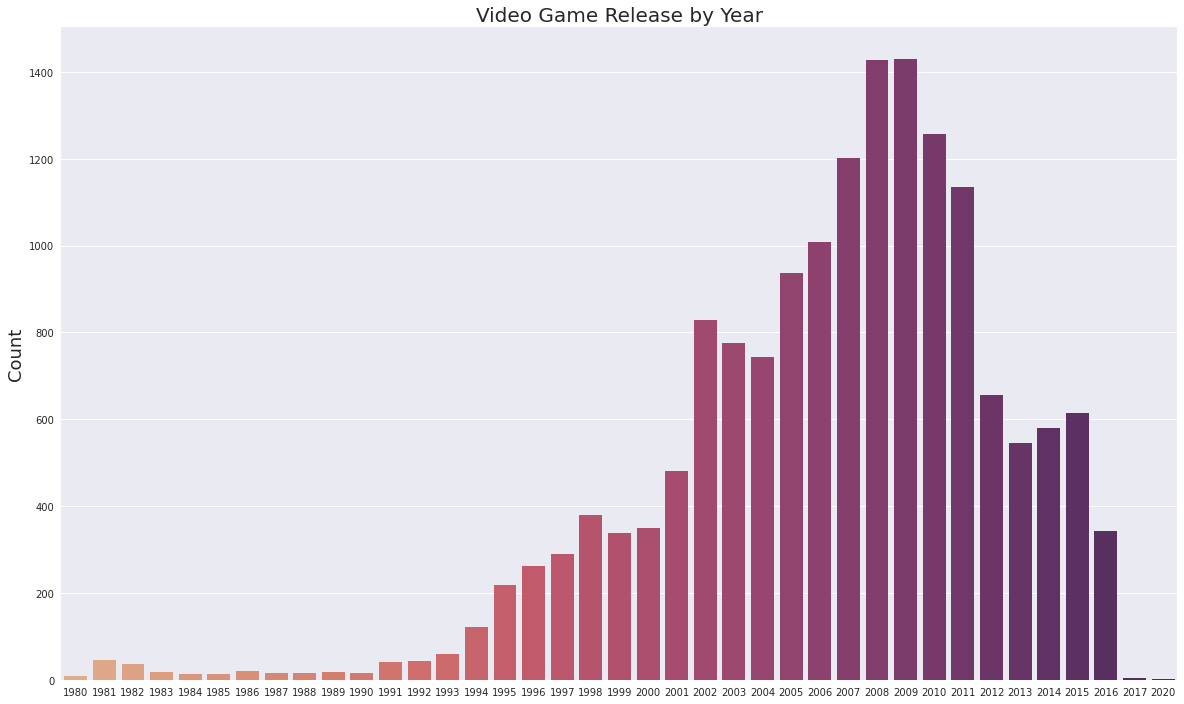

In [11]:
rel_by_year = df.groupby('Year', as_index=False)['Name'].count().astype({'Year':'int'}).rename(columns={'Name':'count'})

sns.barplot(x='Year', y='count', data=rel_by_year, palette="flare")
plt.title('Video Game Release by Year', fontsize=20)
plt.xlabel('')
plt.ylabel('Count', fontsize=18);

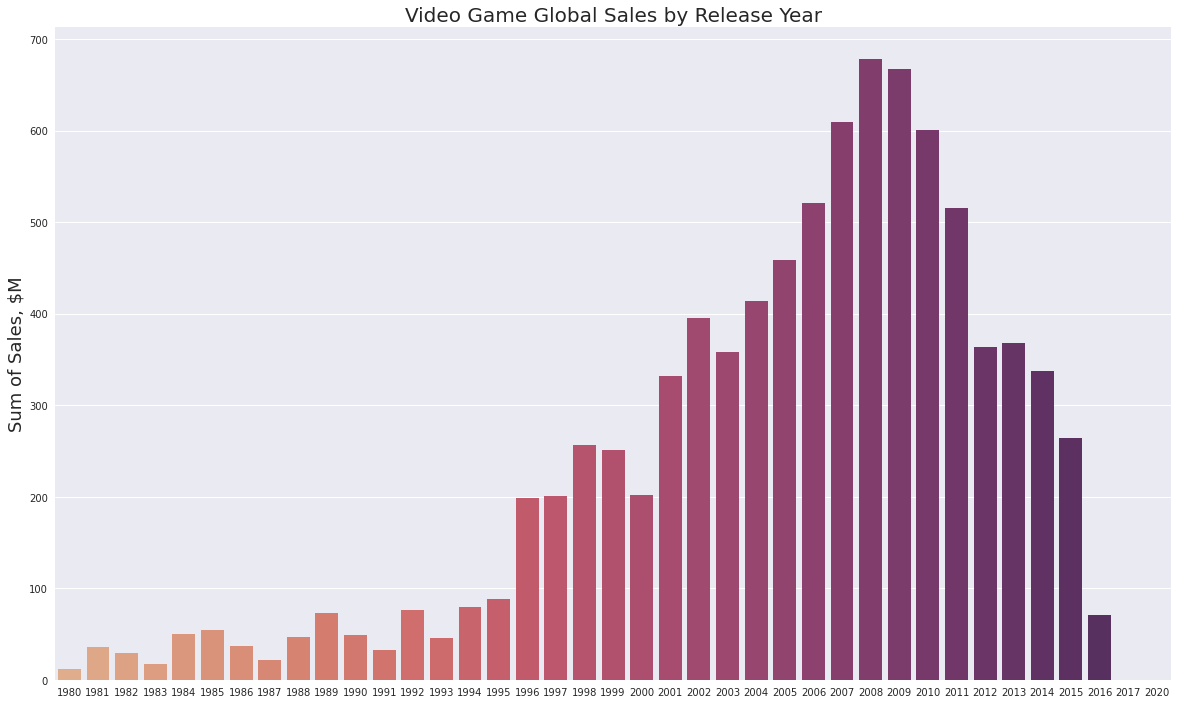

In [12]:
glsales_by_year=df.groupby('Year', as_index=False)['Global_Sales'].sum().astype({'Year':'int'})

sns.barplot(x='Year', y='Global_Sales', data=glsales_by_year, palette="flare")
plt.title('Video Game Global Sales by Release Year', fontsize=20)
plt.xlabel('')
plt.ylabel('Sum of Sales, $M', fontsize=18);

### Publisher Wise Analysis

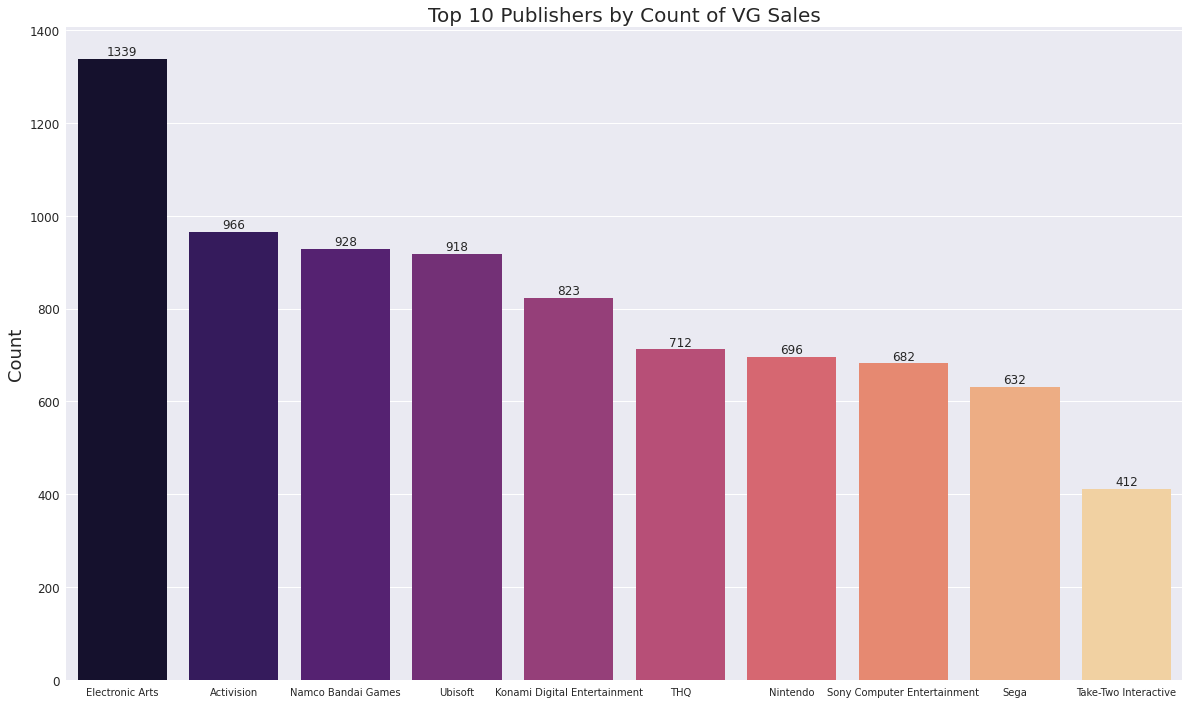

In [13]:
top_publ=df.groupby('Publisher', as_index=False)['Name'].count().sort_values('Name', ascending=False).rename(columns={'Name':'count'})

ax = sns.barplot(x='Publisher', y='count', data=top_publ[:10], palette="magma")
plt.title('Top 10 Publishers by Count of VG Sales', fontsize=20)
plt.xlabel('')
plt.ylabel('Count', fontsize=18)
plt.yticks(fontsize=12)
for i in ax.patches:
    ax.text(i.get_x()+i.get_width()/2, i.get_height()+1, int(i.get_height()),  ha='center', va='bottom', fontsize = 12)

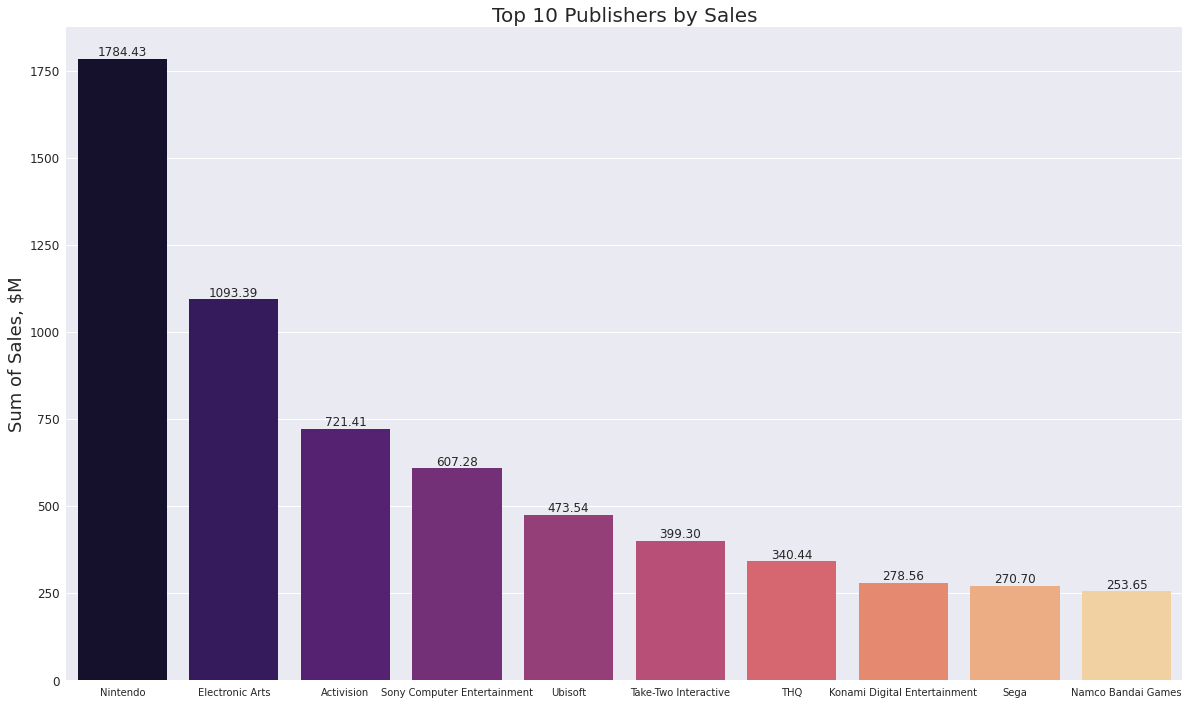

In [14]:
glsales_by_publ=df.groupby('Publisher', as_index=False)['Global_Sales'].sum().sort_values('Global_Sales', ascending=False)

ax = sns.barplot(x='Publisher', y='Global_Sales', data=glsales_by_publ[:10], palette="magma")
plt.title('Top 10 Publishers by Sales', fontsize=20)
plt.xlabel('')
plt.ylabel('Sum of Sales, $M', fontsize=18)
plt.yticks(fontsize=12)
for i in ax.patches:
    ax.text(i.get_x()+i.get_width()/2, i.get_height()+1, "%.2f" % i.get_height(),  ha='center', va='bottom', fontsize = 12)

### Platform Wise Analysis

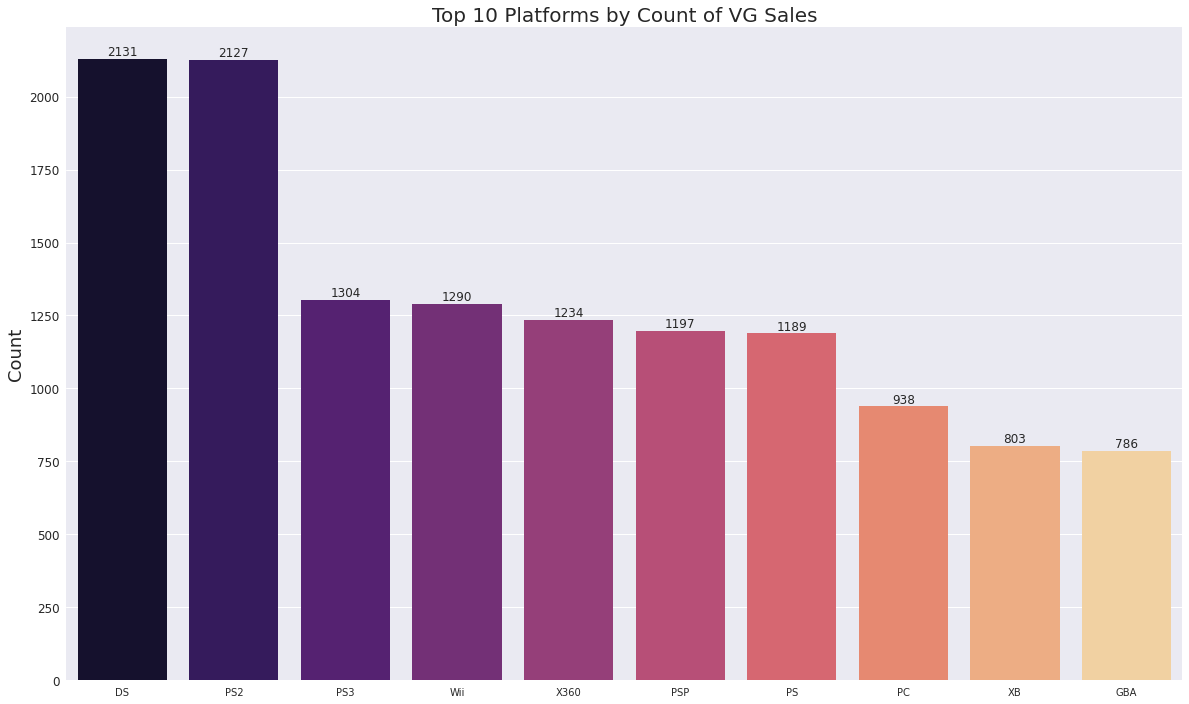

In [15]:
top_platforms=df.groupby('Platform', as_index=False)['Name'].count().sort_values('Name', ascending=False).rename(columns={'Name':'count'})

ax = sns.barplot(x='Platform', y='count', data=top_platforms[:10], palette="magma")
plt.title('Top 10 Platforms by Count of VG Sales', fontsize=20)
plt.xlabel('')
plt.ylabel('Count', fontsize=18)
plt.yticks(fontsize=12)
for i in ax.patches:
    ax.text(i.get_x()+i.get_width()/2, i.get_height()+1, int(i.get_height()),  ha='center', va='bottom', fontsize=12)

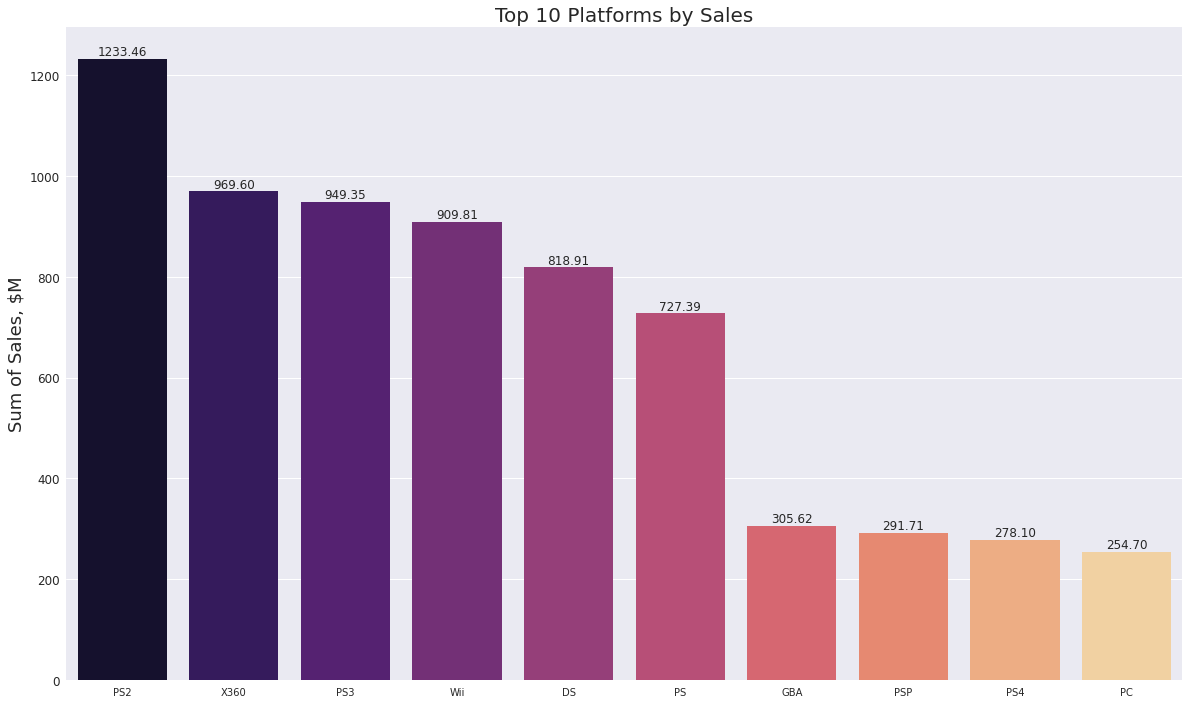

In [16]:
glsales_by_pform = df.groupby('Platform', as_index=False)['Global_Sales'].sum().sort_values('Global_Sales', ascending=False)

ax = sns.barplot(x='Platform', y='Global_Sales', data=glsales_by_pform[:10], palette="magma")
plt.title('Top 10 Platforms by Sales', fontsize=20)
plt.xlabel('')
plt.ylabel('Sum of Sales, $M', fontsize=18)
plt.yticks(fontsize=12)
for i in ax.patches:
    ax.text(i.get_x()+i.get_width()/2, i.get_height()+1, "%.2f"%i.get_height(),  ha='center', va='bottom', fontsize = 12)
    

### Region Wise Sales per Platform

In [17]:
NA_Sales = df.groupby('Platform', as_index=False)['NA_Sales'].sum().sort_values('NA_Sales', ascending=False)
EU_Sales = df.groupby('Platform', as_index=False)['EU_Sales'].sum().sort_values('EU_Sales', ascending=False)
JP_Sales = df.groupby('Platform', as_index=False)['JP_Sales'].sum().sort_values('JP_Sales', ascending=False)
Other_Sales = df.groupby('Platform', as_index=False)['Other_Sales'].sum().sort_values('Other_Sales', ascending=False)

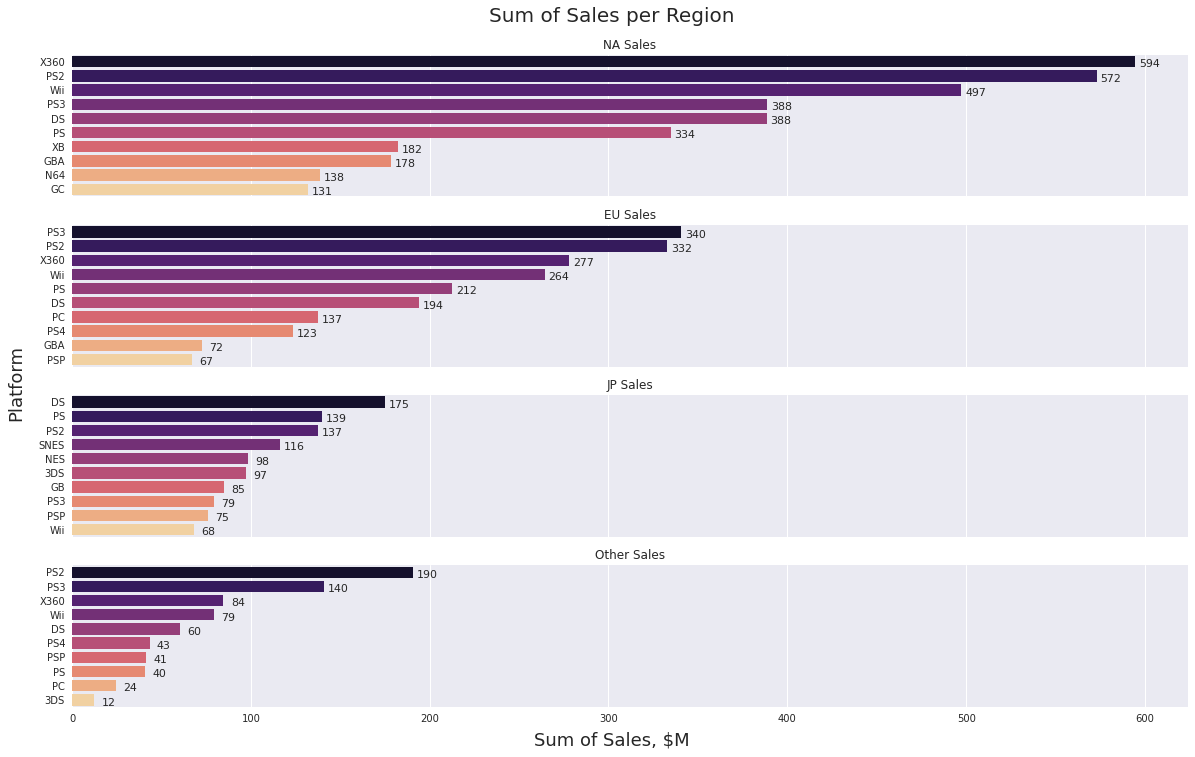

In [18]:
fig, [ax1, ax2,ax3, ax4] = plt.subplots(nrows=4, ncols=1, sharex=True)
fig.suptitle('Sum of Sales per Region', x=0.5, y=0.935, fontsize=20)
ax1.set_title('NA Sales')
ax2.set_title('EU Sales')
ax3.set_title('JP Sales')
ax4.set_title('Other Sales')


sns.barplot(ax=ax1, x='NA_Sales', y='Platform', data=NA_Sales[:10], palette="magma", orient='h')
sns.barplot(ax=ax2, x='EU_Sales', y='Platform', data=EU_Sales[:10], palette="magma", orient='h')
sns.barplot(ax=ax3, x='JP_Sales', y='Platform', data=JP_Sales[:10], palette="magma", orient='h')
sns.barplot(ax=ax4, x='Other_Sales', y='Platform', data=Other_Sales[:10], palette="magma", orient='h')


ax1.set(xlabel=None, ylabel=None)
ax2.set(xlabel=None, ylabel=None)
ax3.set(xlabel=None, ylabel=None)
ax4.set(xlabel=None, ylabel=None)

fig.text(0.08, 0.5, 'Platform', va='center', rotation='vertical', fontsize=18)
fig.text(0.5, 0.08, 'Sum of Sales, $M', ha='center', fontsize=18)

for i in fig.axes:
    for j in i.patches:
        i.text(j.get_width()+8, j.get_y()+j.get_height(), int(j.get_width()), ha='center', fontsize=11)

### Genre Wise Analysis

In [19]:
sort_genre = df.groupby('Genre', as_index=False)['Name'].count().rename(columns={'Name':'count'}).sort_values('count', ascending=False)

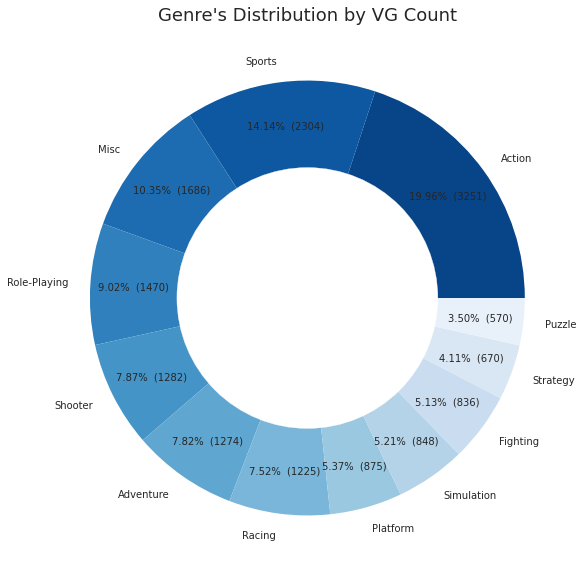

In [20]:
plt.rcParams["figure.figsize"] = (16,10)

group_size = sort_genre['count'].values.tolist()
group_labels = sort_genre['Genre'].values.tolist()
palette = sns.color_palette('Blues_r', 12)

#plt.pie(group_size, autopct='%1.1f%%', labels=group_labels, pctdistance=0.8, colors=palette)
plt.pie(group_size, autopct=lambda p: '{:.2f}%  ({:.0f})'.format(p,p * sum(group_size)/100), labels=group_labels, pctdistance=0.8, colors=palette)
central_circle = plt.Circle((0, 0), 0.6, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.title('Genre\'s Distribution by VG Count', fontsize=18);

In [21]:
glsales_genre = df.groupby('Genre', as_index=False)['Global_Sales'].sum().sort_values('Global_Sales', ascending=False)

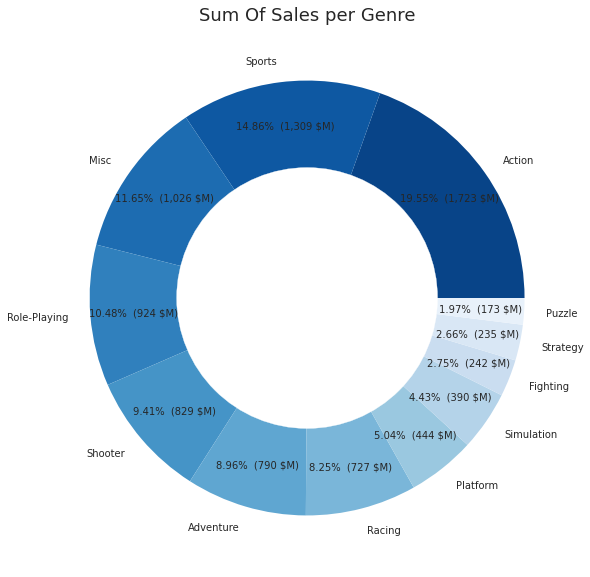

In [22]:
group_size = glsales_genre['Global_Sales'].values.tolist()
group_labels = sort_genre['Genre'].values.tolist()
palette = sns.color_palette('Blues_r', 12)

plt.pie(group_size, autopct=lambda p: '{:.2f}%  ({:,.0f} $M)'.format(p,p * sum(group_size)/100), labels=group_labels, pctdistance=0.8, colors=palette)
central_circle = plt.Circle((0, 0), 0.6, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.title('Sum Of Sales per Genre', fontsize=18);

In [23]:
NA_genre = df.groupby('Genre', as_index=False)['NA_Sales'].sum()
EU_genre = df.groupby('Genre', as_index=False)['EU_Sales'].sum()
JP_genre = df.groupby('Genre', as_index=False)['JP_Sales'].sum()
Other_genre = df.groupby('Genre', as_index=False)['Other_Sales'].sum()

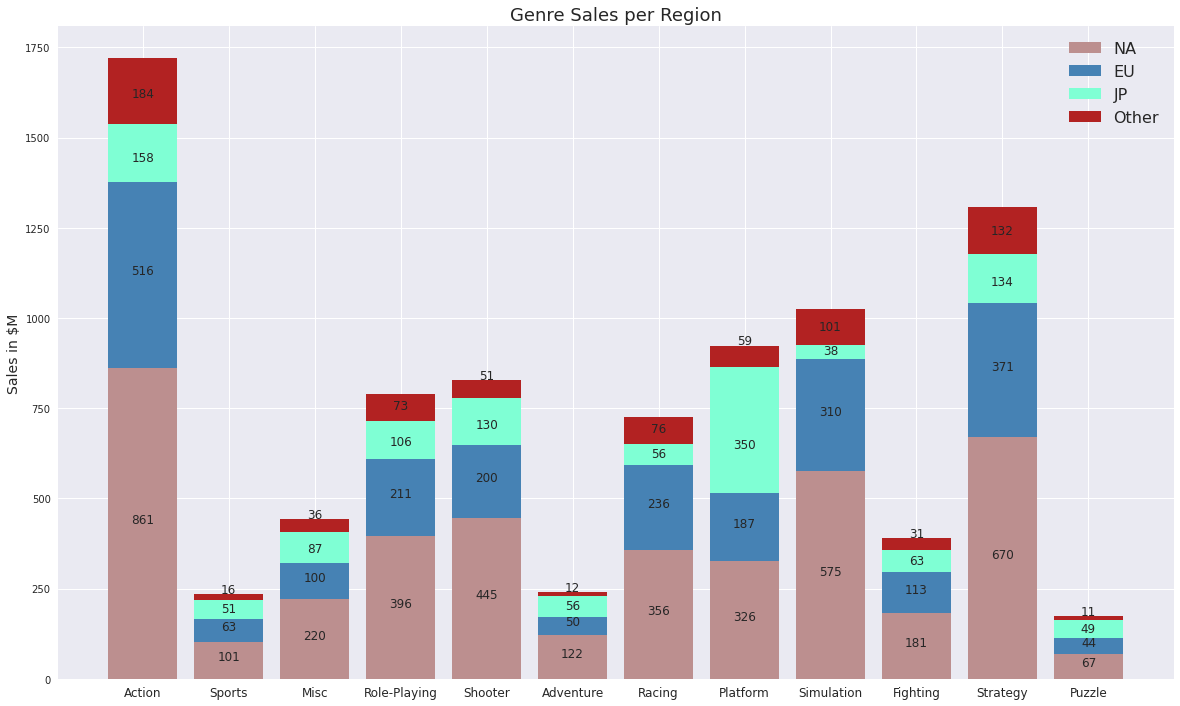

In [24]:
plt.rcParams["figure.figsize"] = (20,12)
fig,ax = plt.subplots()

plt.title('Genre Sales per Region', fontsize=18)

bar_na = np.array(NA_genre['NA_Sales'])
bar_eu = np.array(EU_genre['EU_Sales'])
bar_jp = np.array(JP_genre['JP_Sales'])
bar_other = np.array(Other_genre['Other_Sales'])


ax.bar(group_labels, bar_na, color='rosybrown') 
ax.bar(group_labels, bar_eu, bottom=bar_na, color='steelblue') 
ax.bar(group_labels, bar_jp, bottom=bar_na+bar_eu, color='aquamarine')
ax.bar(group_labels, bar_other, bottom=bar_na+bar_eu+bar_jp, color='firebrick')
ax.set_ylabel('Sales in $M', {'fontname':'Arial', 'fontsize':14})
ax.legend(["NA", "EU", "JP", "Other"], fontsize=16)
ax.set_xticklabels(group_labels, fontsize=12)
x_pos = 0
for i in list(zip(bar_na, bar_eu, bar_jp, bar_other)):
    ax.text(x_pos, i[0]/2, int(i[0]), ha='center', fontsize=12)
    ax.text(x_pos, i[1]/2+i[0], int(i[1]), ha='center', fontsize=12)
    ax.text(x_pos, i[2]/2.8+(i[1]+i[0]), int(i[2]), ha='center', fontsize=12)
    if i[3] < 60:
        ax.text(x_pos, i[3]+i[2]+i[1]+i[0]+2, int(i[3]), ha='center', fontsize=12)
    else:
        ax.text(x_pos, i[3]/2.5+i[2]+i[1]+i[0]+2, int(i[3]), ha='center', fontsize=12)
    x_pos+=1

### Video Game Rank per Region

In [25]:
top_games_eu = df.groupby('Name', as_index=False).agg({'EU_Sales': 'sum'}).sort_values('EU_Sales', ascending=False)
top_games_na = df.groupby('Name', as_index=False).agg({'NA_Sales': 'sum'}).sort_values('NA_Sales', ascending=False)
top_games_jp = df.groupby('Name', as_index=False).agg({'JP_Sales': 'sum'}).sort_values('JP_Sales', ascending=False)
top_games_other = df.groupby('Name', as_index=False).agg({'Other_Sales': 'sum'}).sort_values('Other_Sales', ascending=False)

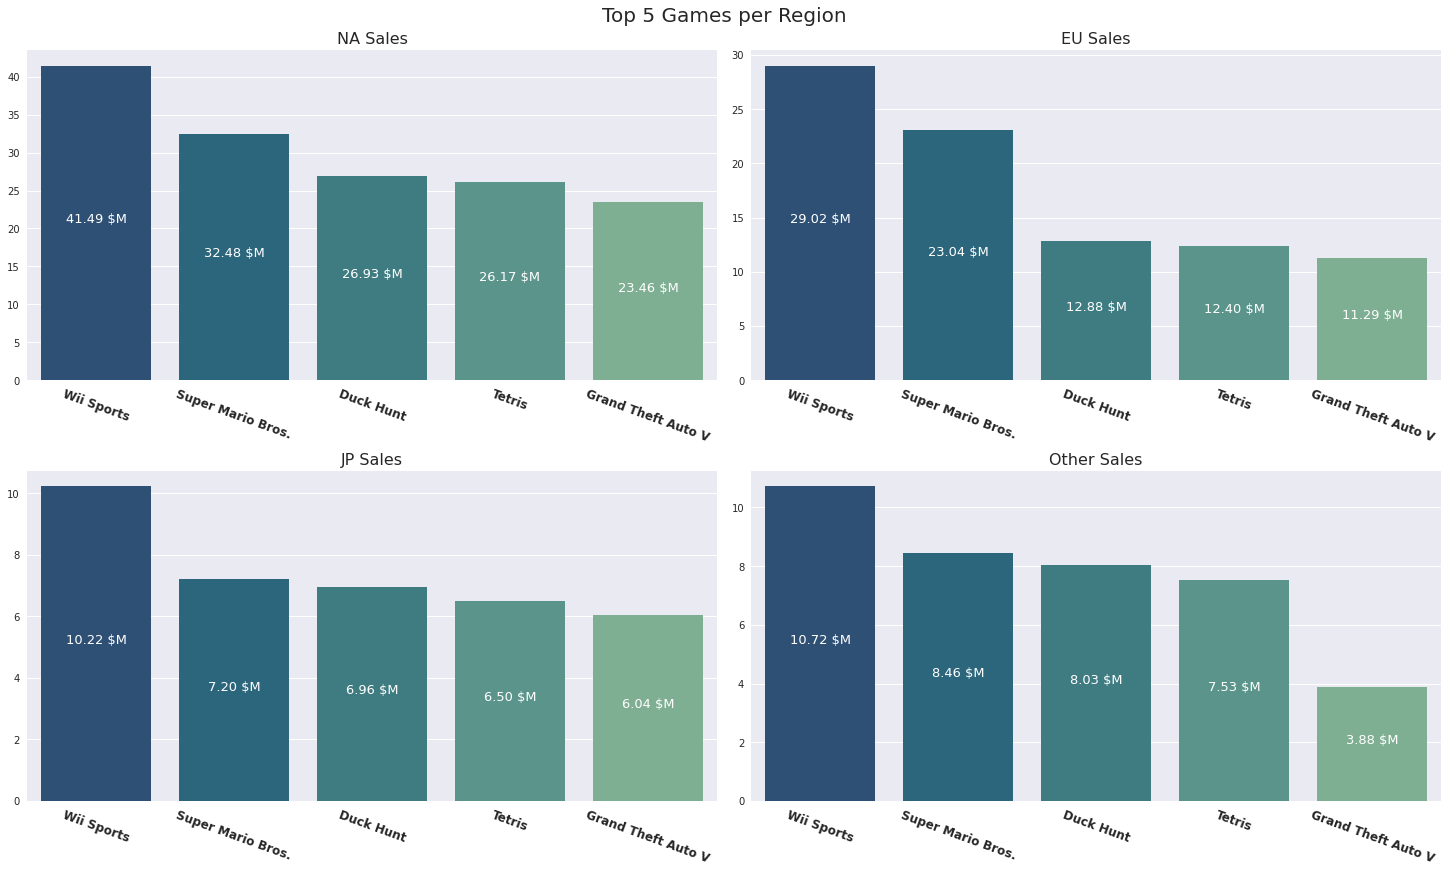

In [26]:
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(nrows=2, ncols=2, constrained_layout = True)
fig.suptitle('Top 5 Games per Region', fontsize=20)

sns.barplot(ax=ax1, x='Name', y='NA_Sales', data=top_games_na[:5], palette='crest_r')
sns.barplot(ax=ax2, x='Name', y='EU_Sales', data=top_games_eu[:5], palette='crest_r')
sns.barplot(ax=ax3, x='Name', y='JP_Sales', data=top_games_jp[:5], palette='crest_r')
sns.barplot(ax=ax4, x='Name', y='Other_Sales', data=top_games_other[:5], palette='crest_r')

ax1.set_title('NA Sales', fontsize=16)
ax2.set_title('EU Sales', fontsize=16)
ax3.set_title('JP Sales', fontsize=16)
ax4.set_title('Other Sales', fontsize=16)

for i in fig.axes:
    x_pos=0
    i.set(xlabel=None, ylabel=None)
    i.set_xticklabels(ax1.get_xticklabels(), rotation=-20, fontsize=12, fontweight='bold')
    for j in i.patches:
        i.text(x_pos, j.get_height()/2, str("%.2f"%j.get_height())+' $M', ha='center', fontsize=13, color='white')
        x_pos+=1

__________

<div align='center'><font color='red'><font size ='5'>Thank you for reading my first notebook!</font></font></div>

![ty](http://d1csarkz8obe9u.cloudfront.net/posterpreviews/thank-you-design-template-6f4f60ed31903710d293d9901170ae8a_screen.jpg?ts=1576981073)
